In [1]:
import math
import string
import itertools
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotx

In [2]:
plt.style.use(matplotx.styles.nord)

In [3]:
def shannon_entropy(data: str) -> float:
    if not data:
        return 0
        
    entropy = 0
    cnt = Counter(data)
    inv = 1 / len(data)
    for c in cnt:
        px = cnt[c] * inv
        entropy += px * math.log2(px)
    return -1 * entropy

In [4]:
def batched(iterable, n):
    iterator = iter(iterable)
    while batch := tuple(itertools.islice(iterator, n)):
        yield batch

In [5]:
def get_words():
    # basically removing noise and repeated words
    for word in open("/usr/share/dict/words").readlines():
        if "'" in word:
            continue

        word = word.strip()
        if len(word) < 4:
            continue

        yield word


words = list(get_words())

def gen_words(length=1024) -> str:
    curr = 0
    ws = []
    while curr < length:
        w = random.choice(words)
        curr += len(w)
        ws.append(w)

    return "".join(ws)[:length]


def gen_rand(length=1024) -> str:
    ws = ""
    for i in range(length):
        ch = random.choice(string.ascii_letters)
        ws += ch

    return ws

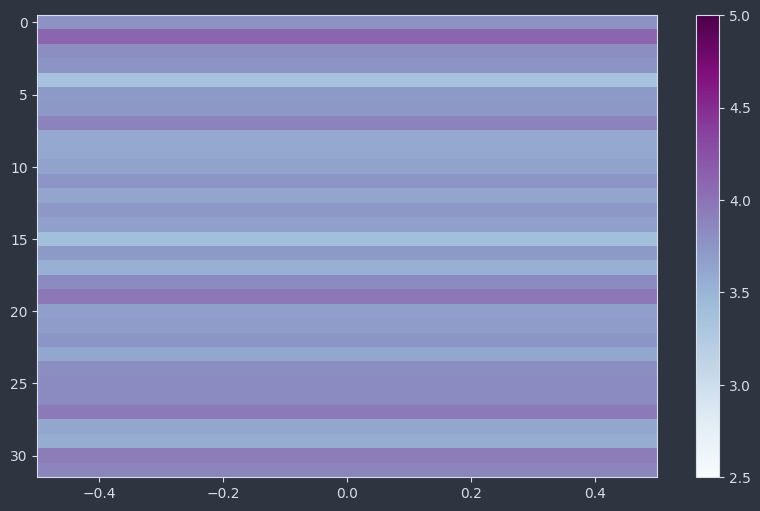

In [6]:
def baseline(size=1024, chunks=32):
    text = gen_words(size)
    df = pd.DataFrame()
    dim = len(text) // chunks
    df['chunks'] = ["".join(b) for b in batched(text, chunks)] 
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(dim, 1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)

baseline()

                              chunks   entropy
12  essmischievousnessraritiesknownr  3.526211
13  epresentsputterssurvivedAviladem  3.569549
14  orzTtvuGRgXUUnQTLWkOFkUPZzOiaoSP  4.476410
15  OrNVAIODHlLbcylkOGDrwnOOLKVaJNyR  4.199699
16  yJjtYkfcrwEPavwuOyKJCsEjWGaLjCTh  4.476410
17  wTbuKhstarlessauguringmerrierabs  3.753928
18  oluteaddressingconsingFarragutco  3.733459
19  rrectestmimickedmoraygargoyleslo  3.702820
20  bedsignWanamakerhumiliatedRudyar  3.941428
21  dJoelMannheimElwoodMarigardenias  3.819549


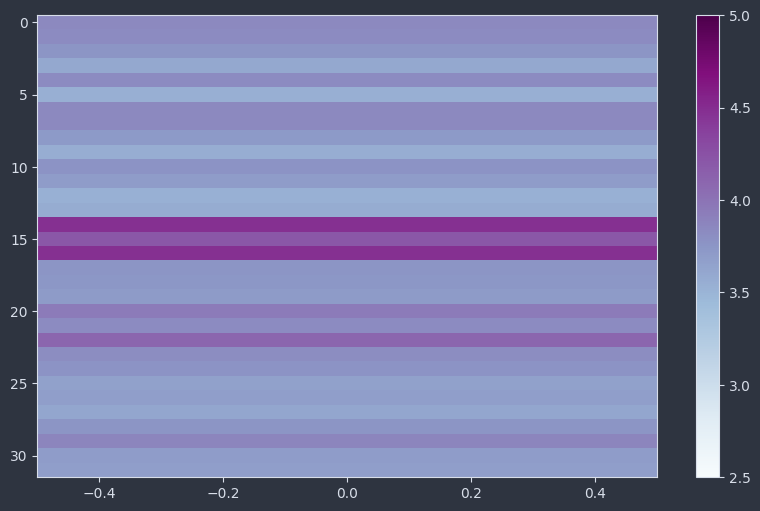

In [7]:
def rand():
    randlong = gen_words(450)
    randlong += gen_rand(100)
    randlong += gen_words(474)
        
    rblock = randlong[:1024]
    df = pd.DataFrame()
    df['chunks'] = ["".join(b) for b in batched(rblock, 32)]
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(len(df['entropy']), 1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)
    print(df[12:22])

rand()

                              chunks   entropy
10   import Path# Build paths inside  3.926109
11   the project like this: BASE_DIR  4.215018
12   / 'subdir'.BASE_DIR = Path(__fi  4.476410
13  le__).resolve().parent.parent# Q  3.902518
14  uick-start development settings   3.965018
15  - unsuitable for production# See  4.054229
16   https://docs.djangoproject.com/  3.991729
17  en/dev/howto/deployment/checklis  3.863609
18  t/# SECURITY WARNING: keep the s  4.238609
19  ecret key used in production sec  3.625807
20  ret!SECRET_KEY = "django-insecur  4.601410
21  e-^!wab4@6tpqdr_)fv_u92ak$rku$im  4.625000
22  tx$p)8m&@v7d+j%r%m1!"# SECURITY   4.812500
23  WARNING: don't run with debug tu  4.152518
24  rned on in production!DEBUG = Tr  3.965018
25  ueALLOWED_HOSTS = []# Applicatio  4.476410
26  n definitionINSTALLED_APPS = ["d  4.241729
27  jango.contrib.admin","django.con  3.715018
28  trib.auth","django.contrib.conte  3.929229
29  nttypes","django.contrib.session  3.952820


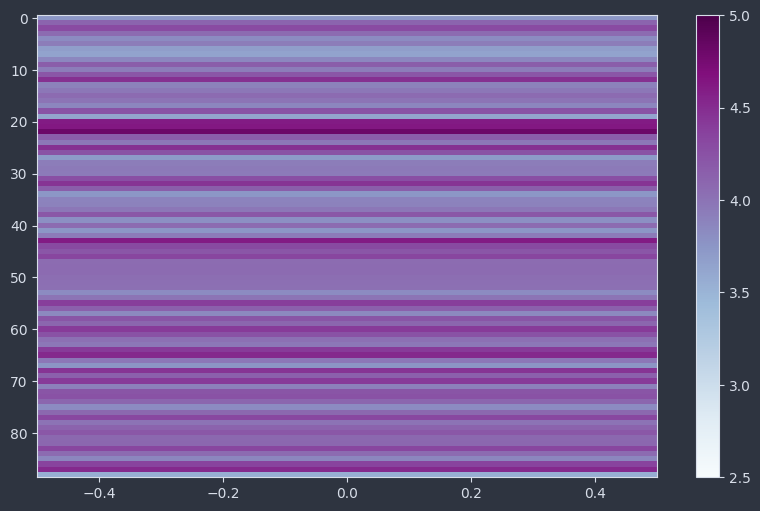

In [8]:
# dj
def dj():
    df = pd.DataFrame()
    data = "".join([line.strip() for line in open('sample-dj-settings.py').readlines()])
    df['chunks'] = ["".join(b) for b in batched(data, 32)]
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(len(df['entropy']), 1)
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)
    print(df[10:30])

dj()